<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/main/Mothers_Day_Google_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Mother's Day and Google Trends__

_Notebook is inspired by:_

_https://medium.com/the-data-science-publication/how-to-use-the-pytrends-api-to-get-google-trends-data-4378acbaaa8a_



In [ ]:
pip install pytrends

In [ ]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

In [ ]:
# build list of keywords
kw_list = ["Mother's Day","Father's Day","Valentine's Day"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2020-01-01 2021-05-09', geo='US')

In [ ]:
# import pandas module
import pandas as pd

# store interest over time information in df
df = pytrends.interest_over_time()

# display the top 20 rows in dataframe
print(df.tail(10))

            Mother's Day  Father's Day  Valentine's Day isPartial
date                                                             
2021-02-28             2             1                1     False
2021-03-07             3             1                0     False
2021-03-14             7             1                0     False
2021-03-21             3             1                0     False
2021-03-28             4             1                0     False
2021-04-04             7             1                0     False
2021-04-11            11             1                0     False
2021-04-18            18             2                0     False
2021-04-25            31             2                0     False
2021-05-02            58             3                0      True


In [314]:

import plotly.graph_objects as go

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df["Father's Day"],
                    mode='lines',
                    name="Father's Day",
                    line = dict(color='cornflower blue')))

fig.add_trace(go.Scatter(x=df.index, y=df["Mother's Day"],
                    mode='lines',
                    name="Mother's Day",
                    line = dict(color='red')))

fig.add_trace(go.Scatter(x=df.index, y=df["Valentine's Day"],
                    mode='lines',
                    name="Valentine's Day",
                    line = dict(color='black')))

fig.update_layout(title_text='Interests Over Time',title_x=0.5)

fig.show()

In [338]:
vday_2020 = df.loc['2020-02-09',"Valentine's Day"]
vday_2021 = df.loc['2021-02-07',"Valentine's Day"]

print("Valentine's Day search interest as of Feb 09, 2020: ",vday_2020)
print("Valentine's Day search interest as of Feb 07, 2021: ",vday_2021)

Valentine's Day search interest as of Feb 09, 2020:  91
Valentine's Day search interest as of Feb 07, 2021:  36


In [310]:
# get interest by region
pytrends.interest_by_region(resolution='REGION', inc_low_vol=False, inc_geo_code=False).sort_values(by="Mother's Day",ascending=False).head(10)

,Mother's Day
geoName,
Hawaii,100
Alaska,93
New Jersey,92
West Virginia,92
Delaware,91
Illinois,89
Maryland,89
Texas,88
Florida,87


In [315]:
# get interest over time
pytrends.interest_over_time().sort_values(by="Mother's Day",ascending=False).iloc[:,[0]].head(10)

,Mother's Day
date,
2020-05-03,100
2020-05-10,84
2021-05-02,58
2020-04-26,47
2021-04-25,31
2021-04-18,18
2020-04-19,16
2021-04-11,11
2021-03-14,7


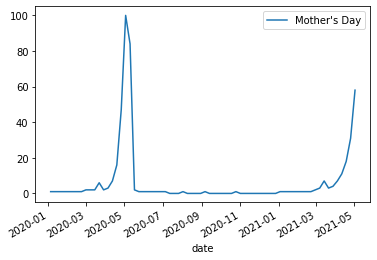

In [ ]:
pytrends.interest_over_time().sort_values(by="Mother's Day",ascending=False).iloc[:,[0]].plot()

In [ ]:
# get trending searches as of 05/09/2021
pytrends.trending_searches(pn='united_states').head(10)

,0
0,Happy Mother's Day
1,Mother's Day cards
2,Allison Janney
3,Tyson Fury
4,Andrew McCarthy
5,Aston Villa vs Man United
6,Bradley Beal
7,Real Madrid vs Sevilla
8,Betamethasone
9,Real Madrid Sevilla


In [ ]:
# get seach suggestions for "Mother's Day"
suggestions = pd.DataFrame.from_dict(pytrends.suggestions("Mother's Day"))
suggestions.iloc[:,[1,2]]

,title,type
0,Mother's Day,Celebration
1,Mother's Day,2016 film
2,Duck Dynasty,American television series
3,Mothering Sunday,Celebration
4,Mother's Day,2010 film


In [ ]:
# build the payload
pytrends.build_payload(kw_list=["Mother's Day"], 
                       timeframe='2020-01-01 2021-05-09', 
                       geo='US') 

# get related topics
df_rt = pytrends.related_topics()

In [ ]:
# top 10 rising results for Mothers Day
df_rt['Mothers Day']["rising"].head(10)

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,20550,Breakout,/trends/explore?q=/g/11flbzhz4d&date=2020-01-0...,/g/11flbzhz4d,Mother's Daughter,Song by Miley Cyrus
1,2750,"+2,750%",/trends/explore?q=/m/01w53b&date=2020-01-01+20...,/m/01w53b,Take-out,Cuisine
2,200,+200%,/trends/explore?q=/m/0bfdbd&date=2020-01-01+20...,/m/0bfdbd,1-800-Flowers,Retail company
3,150,+150%,/trends/explore?q=/m/0gly62&date=2020-01-01+20...,/m/0gly62,Edible Arrangements,Company
4,120,+120%,/trends/explore?q=/g/11h79tx_ns&date=2020-01-0...,/g/11h79tx_ns,Gift Box,Topic
5,120,+120%,/trends/explore?q=/m/03r8dh&date=2020-01-01+20...,/m/03r8dh,Greeting card,Topic
6,100,+100%,/trends/explore?q=/m/09d4bv&date=2020-01-01+20...,/m/09d4bv,Flower delivery,Topic
7,90,+90%,/trends/explore?q=/m/01z562&date=2020-01-01+20...,/m/01z562,Basket,Topic
8,70,+70%,/trends/explore?q=/m/0c9ph5&date=2020-01-01+20...,/m/0c9ph5,Flower,Topic


In [311]:
# top 10 rising search results for Mothers Day
top_results = df_rt['Mothers Day']["rising"].head(10)

fig = go.Figure(data=[go.Bar(
    x=top_results.topic_title,
    y=top_results.value)])

fig.update_layout(title_text='Top 10 Rising Google Results for Mothers Day')

fig.show()

In [ ]:
# top 10 results for Mothers Day
top_results = df_rt['Mothers Day']["top"].head(10)

fig = go.Figure(data=[go.Bar(
    x=top_results.topic_title,
    y=top_results.value)])

fig.update_layout(title_text='Top 10 Google Results for Mothers Day',title_x=0.5)

fig.show()